In [1]:

import mako.template
import glob
import IPython.display
import matplotlib.pyplot as plt
import PIL.Image
%matplotlib inline

/Users/fedor/.virtualenvs/py3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:


uris = []
for path in glob.glob('paintings/*.jpg'):
    uris.append(path)

In [3]:
template = """
<style>

.paintings {
  display: flex;
  flex-flow: column wrap;
  max-height: 800px;
  overflow: hidden;


}
.painting img {
  width: 200px;
  height: 200px;
}
</style>
<div class="paintings">
% for uri in uris:
    <div class="painting">
        <img src="${uri}" /> 
    </div>
% endfor
</div>
"""
T = mako.template.Template(template)

In [4]:
IPython.display.HTML(T.render(uris=uris[:30]))

In [5]:
path = 'paintings/Q1634134.jpg'
path = 'paintings/Q1170315.jpg'
path = 'paintings/Q1131476.jpg'
path = 'paintings/Q11824931.jpg'
path = 'paintings/Q11824917.jpg'
path = 'paintings/Q1000128.jpg'
path = 'paintings/Q11824961.jpg'
#path = 'paintings/Q1132486.jpg'

In [6]:
import cv2
import numpy as np


In [7]:
def imread(path):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

def fill_corners(img):
    img_filled = img.copy()
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    lo_diff = (10, ) * 3
    up_diff = (10, ) * 3

    fill_mask = 255
    # pff
    flags = 4 | cv2.FLOODFILL_MASK_ONLY | (fill_mask << 8)

    # fill all corners
    for pt in [(0, 0), (w-1, 0), (0, h-1), (w-1, h-1)]:
        l = cv2.cvtColor(img_filled, cv2.COLOR_RGB2HLS)[pt[1], pt[0]][1]
        # not a very bright corner
        if l < 200:
            # skip it
            continue
        else:
            ret = cv2.floodFill(img_filled, mask, pt, 255, lo_diff, up_diff, flags)
            # final mask
            n, img_filled, mask, box = ret
    # mask is in values 1,255, rescale to 255, 0
    mask_bool = mask[1:-1,1:-1] == 255
    # convert to alpha channel (0, 1) => 255,0
    alpha = ((1-mask_bool.astype('uint8'))*255)[:,:,np.newaxis]

    if mask_bool.sum() > 100:
        # if we filled in several pixels, return the filled
        img_rgba = np.dstack([img_filled, alpha])
    else:
        # else return the original
        img_rgba = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
    return img_rgba

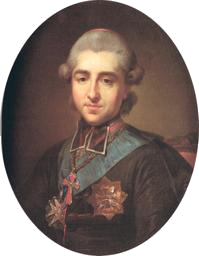

In [8]:
PIL.Image.fromarray(fill_corners(imread(path)))

In [9]:
import numpy as np

In [10]:
def flat_img(img):
    # compute mask from alpha channel
    if img.shape[-1] == 4:
        mask = (img[...,3] == 0).flatten()
    else:
        mask = np.ones_like(img[...,0].flatten(), dtype='bool')
    img_flat = img.reshape((np.prod(img.shape[:2]),) + img.shape[2:])
    # return and drop 4th channel
    return img_flat[~mask, :3]
img = fill_corners(imread(path))
flat_img(img).shape


(40407, 3)

In [11]:
values, bins = np.histogramdd(flat_img(img))

In [12]:
import matplotlib.mlab

In [14]:
import vispy.gloo

In [16]:
import pandas

In [17]:
R, G, B = np.meshgrid(*[x[:-1] for x in bins])
df = pandas.DataFrame(
    data={
        'R': R.flatten(),
        'G': G.flatten(),
        'B': B.flatten(),
        'value': values.flatten()
    }
)

In [21]:
import vispy.mpl_plot
import vispy.plot

In [22]:
vispy.use('pyqt5')

In [28]:
fig = vispy.plot.Fig(bgcolor='w', size=(800, 600), show=True)
ax = fig[0, 0]
ax.plot(R.flatten())

In [29]:
fig.show()